# Fifa 2018: Player's Month of Birth Analysis

**Inspiration:**

Last summer (2017) my brother recommended me to read a book name "*Superfreakonomics*" written by Steven Levitt & Stephen J. Dubner in which he told me I could find many interesting theories proven by facts. I got into it and I must say I was impress. One of the chapters is based on the previous study that professional NHL players are mostly born in the first few months of the years. The theory goes on explaining the main reason: "*Relative age effects (RAEs) occur when those who are relatively older for their age group are more likely to succeed*".

This inspired me to try and prove it on professional soccer players. However, I could not find a dataset containing the information needed. I have finally obtained from [Kaggle](https://www.kaggle.com/) thanks to Kevinmh for it [KevinH](https://www.kaggle.com/kevinmh)
    


**Objective:**

So the main question to be answer is:

##### Are professional soccer players born in the first months of the year?

I will use descriptive analytics around the month of birth of professional soccer players 


**Context:**

The fifa2018 dataset contains all the statistics and playing attributes of all the players in the Full version of FIFA 18 (a videogame in a series of association football video games or football simulators releashed annually by Electronic Arts under the EA Sports label). 

**Acknowledgements:**

Thanks to [KevinH](https://www.kaggle.com/kevinmh) for generating this dataset.
    

# Table of Contents

1. [Objective](#1.-Objective) Clear definition of the objective 
2. [Preliminaries](#2.-Preliminaries)  Load libraries and set the environment
3. [Load Data](#3.-Load-Data) Load the data from the source into variables and verify the information
4. [Data Preparation](#4.-Data-preparation) Create, modify and/or transform variables
5. [Error Management](#5.-Error-Management) Manage possible errors 
6. [Visualizations](#6.-Visualizations) Plot and examine information using seaborn and matplotlib
7. [Conclusions](#7.-Conclusions) Describe the insights achieved, the patterns in data. 


# 1. Objective

The main question is:

**Does it matter when you are born to be a professional soccer player?**

It turns out that hockey players were mostly born in the first months of the year. Does it happen in soccer? 

I will analyze data trying to prove wrong or right this hypothesis for soccer players. 





# 2. Preliminaries

In [1]:
# load libraries and set styles options
import warnings; warnings.simplefilter('ignore')

# libraries for data manipulation
import numpy as np 
import pandas as pd 

# Libraries for data visualization
import seaborn as sns #Data visualization
import matplotlib.pyplot as plt
import matplotlib; matplotlib.style.use('ggplot')

# Configuration for 'pandas' library
from pandas import set_option
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

from ipywidgets import interact

# Seaborn option settings
sns.set_context("notebook")
sns.set_palette('husl')

# 3. Load Data 

In [2]:
# read csv dataset and load into pandas dataframe object "df"
df = pd.read_csv('./data/fifa2018.csv', encoding='utf_8')

In [3]:
# check first few lines
df.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,weight_kg,body_type,real_face,flag,nationality,photo,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,...,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,True,https://cdn.sofifa.org/flags/38@3x.png,Portugal,https://cdn.sofifa.org/18/players/20801.png,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,High,Low,Right,85,94,88,83,88,91,81,76,77,93,89,91,89,96,63,94,95,...,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,True,https://cdn.sofifa.org/flags/52@3x.png,Argentina,https://cdn.sofifa.org/18/players/158023.png,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,Medium,Medium,Left,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,...,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,68.0,Neymar,True,https://cdn.sofifa.org/flags/54@3x.png,Brazil,https://cdn.sofifa.org/18/players/190871.png,123000000.0,280000.0,236800000.0,92,94,92,84,79,95,30,60,5,5,5,High,Medium,Right,75,89,62,81,83,96,81,84,75,95,94,90,96,88,82,80,61,...,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,86.0,Normal,True,https://cdn.sofifa.org/flags/60@3x.png,Uruguay,https://cdn.sofifa.org/18/players/176580.png,97000000.0,510000.0,198900000.0,92,92,82,90,79,87,42,81,5,4,4,High,Medium,Right,77,94,77,83,88,86,86,84,64,91,88,77,86,93,60,87,69,...,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,

In [4]:
# verify data frame shape
df.shape

(17994, 185)

    These means there are 17.994 players with 185 attributes

In [5]:
# Visualice the name of each columns and 
# the corresponding number for selection
for e, col in enumerate(df.columns):
    print(e,"->",col)

0 -> ID
1 -> name
2 -> full_name
3 -> club
4 -> club_logo
5 -> special
6 -> age
7 -> league
8 -> birth_date
9 -> height_cm
10 -> weight_kg
11 -> body_type
12 -> real_face
13 -> flag
14 -> nationality
15 -> photo
16 -> eur_value
17 -> eur_wage
18 -> eur_release_clause
19 -> overall
20 -> potential
21 -> pac
22 -> sho
23 -> pas
24 -> dri
25 -> def
26 -> phy
27 -> international_reputation
28 -> skill_moves
29 -> weak_foot
30 -> work_rate_att
31 -> work_rate_def
32 -> preferred_foot
33 -> crossing
34 -> finishing
35 -> heading_accuracy
36 -> short_passing
37 -> volleys
38 -> dribbling
39 -> curve
40 -> free_kick_accuracy
41 -> long_passing
42 -> ball_control
43 -> acceleration
44 -> sprint_speed
45 -> agility
46 -> reactions
47 -> balance
48 -> shot_power
49 -> jumping
50 -> stamina
51 -> strength
52 -> long_shots
53 -> aggression
54 -> interceptions
55 -> positioning
56 -> vision
57 -> penalties
58 -> composure
59 -> marking
60 -> standing_tackle
61 -> sliding_tackle
62 -> gk_diving
63 ->

From the total amount of 185 columns, in this project only the next will be use:

**Player information**
 - 0 -> ID
 - 2 -> full_name
 - 3 -> club
 - 6 -> age
 - 7 -> league
 - 8 -> birth_date
 - 9 -> height_cm
 - 10 -> weight_kg
 - 14 -> nationality
 - 19 -> overall



In [6]:
# Dicard unnecesary rows
# There are 185 however the load of data
# will only be done with the selected columns

selectedColumns = [0,2,3,6,7,8,9,10,14,19]

# load data into a DataFrame object named 'df'
df = pd.read_csv('./data/fifa2018.csv', encoding='utf_8', usecols=selectedColumns)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head(5))


,ID,full_name,club,age,league,birth_date,height_cm,weight_kg,nationality,overall
0,20801,C. Ronaldo dos Santos Aveiro,Real Madrid CF,32,Spanish Primera División,1985-02-05,185.0,80.0,Portugal,94
1,158023,Lionel Messi,FC Barcelona,30,Spanish Primera División,1987-06-24,170.0,72.0,Argentina,93
2,190871,Neymar da Silva Santos Jr.,Paris Saint-Germain,25,French Ligue 1,1992-02-05,175.0,68.0,Brazil,92
3,176580,Luis Suárez,FC Barcelona,30,Spanish Primera División,1987-01-24,182.0,86.0,Uruguay,92
4,167495,Manuel Neuer,FC Bayern Munich,31,German Bundesliga,1986-03-27,193.0,92.0,Germany,92


In [7]:
# verify dataframe shape
df.shape

(17994, 10)

These means there are 17.994 players and we have selected 10 columns or attributes 

In [8]:
# set dataframe row index to ID
df = df.set_index('ID')

In [9]:
# check first few lines
df.head()

,full_name,club,age,league,birth_date,height_cm,weight_kg,nationality,overall
ID,,,,,,,,,
20801,C. Ronaldo dos Santos Aveiro,Real Madrid CF,32,Spanish Primera División,1985-02-05,185.0,80.0,Portugal,94
158023,Lionel Messi,FC Barcelona,30,Spanish Primera División,1987-06-24,170.0,72.0,Argentina,93
190871,Neymar da Silva Santos Jr.,Paris Saint-Germain,25,French Ligue 1,1992-02-05,175.0,68.0,Brazil,92
176580,Luis Suárez,FC Barcelona,30,Spanish Primera División,1987-01-24,182.0,86.0,Uruguay,92
167495,Manuel Neuer,FC Bayern Munich,31,German Bundesliga,1986-03-27,193.0,92.0,Germany,92


In [10]:
# review dataframe info
df.info()
# This will display information about each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17994 entries, 20801 to 238308
Data columns (total 9 columns):
full_name      17994 non-null object
club           17741 non-null object
age            17994 non-null int64
league         17741 non-null object
birth_date     17994 non-null object
height_cm      17994 non-null float64
weight_kg      17994 non-null float64
nationality    17994 non-null object
overall        17994 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.4+ MB


# 4. Data preparation



The next step is to prepare data for the analysis. 

The preparation requieres:
* 4.1 Manage soccer players duplication (if any)
* 4.2 Manage empty values (if any)
* 4.3 Extract information from date of birth
* 4.4 Create categories for player's overall



## 4.1 Manage soccer players duplication (if any)


In [11]:
# Look for duplicates
df.duplicated().sum()

0

There is no information duplicated. 

## 4.2 Manage empty values (if any)

In [12]:
# look for Nan values (if any)
pd.isnull(df).sum()

full_name        0
club           253
age              0
league         253
birth_date       0
height_cm        0
weight_kg        0
nationality      0
overall          0
dtype: int64

This shows that there are empty values in columns:

- **club**
- **league** 

Each of these columns contain 253 empty values

In [13]:
# Display % clubs with NaN values
df.club.isnull().value_counts() / len(df)

False    0.98594
True     0.01406
Name: club, dtype: float64

In [14]:
# Display % leagues with NaN values
df.club.isnull().value_counts() / len(df)

False    0.98594
True     0.01406
Name: club, dtype: float64

Relevant facts:
 - Data missing is about 'club' and 'league',
 - Data missing is 1.5% from the total 

I have decided to fill the Nan values of club and league to value "unknown" in order to proceed. 

In [15]:
# club and league NaN values are asigned "Unknown"
df.club.fillna("Unknown", inplace=True)
df.league.fillna("Unknown", inplace=True)

In [16]:
# look for Nan values (if any)
pd.isnull(df).sum()

full_name      0
club           0
age            0
league         0
birth_date     0
height_cm      0
weight_kg      0
nationality    0
overall        0
dtype: int64

## 4.3 Extract information from date of birth

In [17]:
# Extraction of the month information from the 'birth_date' information
df['month'] = pd.DatetimeIndex(df['birth_date']).month
df['year'] = pd.DatetimeIndex(df['birth_date']).year

# Set the type of column 'month' and 'year' as int
df.month = df.month.astype(int)
df.year = df.year.astype(int)

## 4.4 Create categories for player's overall

In [18]:
#Lets create a column with the overall category of the player
df.overall.describe()

count    17994.000000
mean        66.253029
std          6.946729
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: overall, dtype: float64

Looking at this we can see that the **minimun** value of overall for a player is
- 46

and the **maximum** value of overall is:
- 94

This information will be use to create different categories in scale of 10 units from 40 to 100

In [19]:
# Prepare a new column "overallCat" to save data about
# overall categories will be:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# First we create and empty column:
df['overallCat'] = np.nan

# Then the column value is changed depending on the given conditions
df['overallCat'].loc[(df['overall'] > 40) & (df['overall'] <=50 )] = 40
df['overallCat'].loc[(df['overall'] > 50) & (df['overall'] <=60 )] = 50
df['overallCat'].loc[(df['overall'] > 60) & (df['overall'] <=70 )] = 60
df['overallCat'].loc[(df['overall'] > 70) & (df['overall'] <=80 )] = 70
df['overallCat'].loc[(df['overall'] > 80) & (df['overall'] <=90 )] = 80
df['overallCat'].loc[(df['overall'] > 90) & (df['overall'] <=100 )] = 90

# display the total values for each category
df.overallCat.value_counts()

60.0    9577
70.0    4434
50.0    3389
80.0     385
40.0     203
90.0       6
Name: overallCat, dtype: int64

In [20]:
df.shape

(17994, 12)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17994 entries, 20801 to 238308
Data columns (total 12 columns):
full_name      17994 non-null object
club           17994 non-null object
age            17994 non-null int64
league         17994 non-null object
birth_date     17994 non-null object
height_cm      17994 non-null float64
weight_kg      17994 non-null float64
nationality    17994 non-null object
overall        17994 non-null int64
month          17994 non-null int32
year           17994 non-null int32
overallCat     17994 non-null float64
dtypes: float64(3), int32(2), int64(2), object(5)
memory usage: 1.6+ MB


# 5. Error Management 

During the analysis of the information on the dataset I have found out that, for some reason, **all players in "Campeonato Brasileiro Série A" were born in february**

I have looked into wikipedia for information regarding soccer players in the Campeonato Brasileiro Série A. It turns out that not all 320 players on this league were born in february. 

Until I modify this dataset to contain the right information I have decided to **delete all soccer players in "Campeonato Brasileiro Série A"**.

This is a total of 320 players to be erased. 


In [22]:
# lets select players form the league and count for each month how many there are. 

numPlayers = df[df['league']== "Campeonato Brasileiro Série A"]['month'].value_counts()
print("Number of players on Campeonato Brasileiro Série A by month of birth:\n",numPlayers)

Number of players on Campeonato Brasileiro Série A by month of birth:
 2    320
Name: month, dtype: int64


In [23]:
print("Before deleting there are: \t",(len(df.league.value_counts())), " leagues")

# Deletion of these players is done by:
df = df[df['league'] != 'Campeonato Brasileiro Série A']

print("After deleting there are: \t",(len(df.league.value_counts())), " leagues")

Before deleting there are: 	 42  leagues
After deleting there are: 	 41  leagues


# 6. Visualizations

Plot and examine distributions using matplotlib and seaborn

- 6.1 General information about month of birth (all soccer players)
  - Quantity of soccer players by month
  - Density of month of birth
  - Player's mean overall by month of birth
  - Density of month of birth by year
  - Density of month of birth for player's born in 1999 and 2000
  
  
- 6.2 Month of birth by League (Top 10 leagues by overall)
  - Quantity of soccer players by month for the selected leagues (one figure)
  - Quantity of soccer players by month for the selected leagues (one figure per league)
  - Density of month of birth by league
  - Density of month of birth comparison for leagues: Italian Serie A and English Premier
 
  
- 6.3 Month of birth by Club (Top 10 clubs)
  - Quantity of soccer players by month for the selected Clubs (one figure)
  - Quantity of soccer players by month for the selected Clubs (one figure for each club)
  - Density of month of birth for Top clubs
  - Month of birth distribution for Top Clubs
  
  
- 6.4 Month of birth by Overall Category
  - Quantity of soccer players by month and Overall Category
  - Density of month of birth by overall category
  - Density of month of birth by overall category (one figure for each category)
  - Density of month of birth comparison for overall category 40 and overall category 90
  
  
- 6.5 Month of birth by nationality (top 10 nationalities by number of players) 
  - Quantity of soccer players by month and nationality
  - Density of month of birth by nationality (one figure)
  - Density of month of birth by nationality (one figure for each nationality)
  - Density of month of birth comparison for 4 nationalities
  



## 6.1 General information about month of birth (all soccer players)

  - Quantity of soccer players by month
  - Density of month of birth
  - Player's overall mean by month of birth
  - Density of month of birth by year
  - Density of month of birth for player's born in 1999 and 2000

### Quantity of soccer players by month

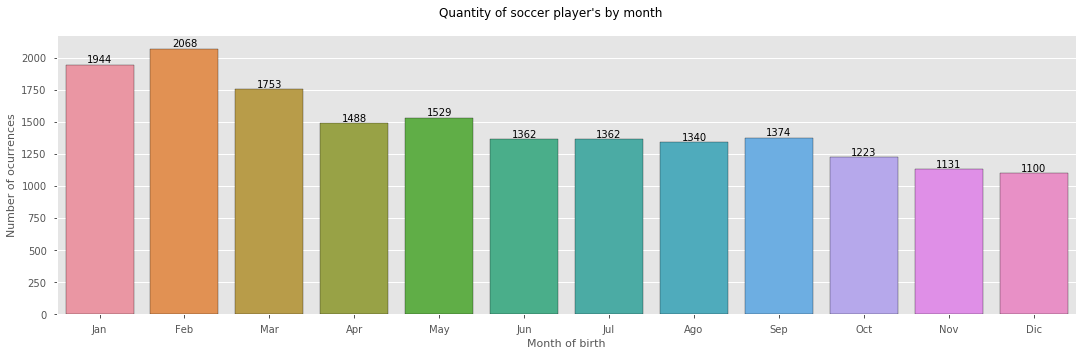

In [24]:
# Create the image
g = sns.factorplot(x='month', 
                   data=df, 
                   kind="count",
                   size=5, aspect=3, 
                   edgecolor='black');

# Configure image visualization
# This gives space to plot the figure title
g.fig.subplots_adjust(top=.9)

# Set the x-axis labels
monthList = ['Jan','Feb','Mar','Apr',
             'May','Jun','Jul','Ago',
             'Sep','Oct','Nov','Dic']
g.set_xticklabels(monthList)

# Set figure title, x-label and y-label
g.fig.suptitle("Quantity of soccer player's by month")
g.set_ylabels("Number of ocurrences")
g.set_xlabels("Month of birth")

# Get current axis on current figure
ax = plt.gca()

# Modify each column value
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., 
            p.get_height(), 
            '%d' % int(p.get_height()), 
            fontsize=10, 
            color='black', ha='center', va='bottom');

### Density of month of birth

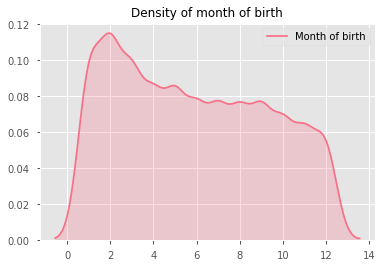

In [25]:
sns.kdeplot(df['month'], 
            label='Month of birth', 
            shade=True)
plt.title("Density of month of birth");

### Player's overall mean by month of birth

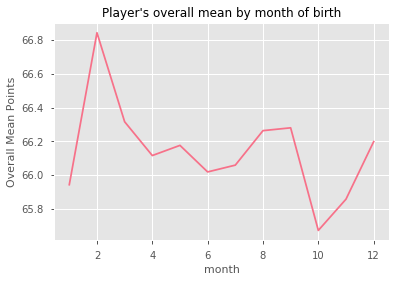

In [26]:
df_overall = df.groupby(['month'])['overall'].mean()

axis = df_overall.plot()
axis.set_ylabel('Overall Mean Points')
axis.set_title("Player's overall mean by month of birth");

### Density of month of birth by year

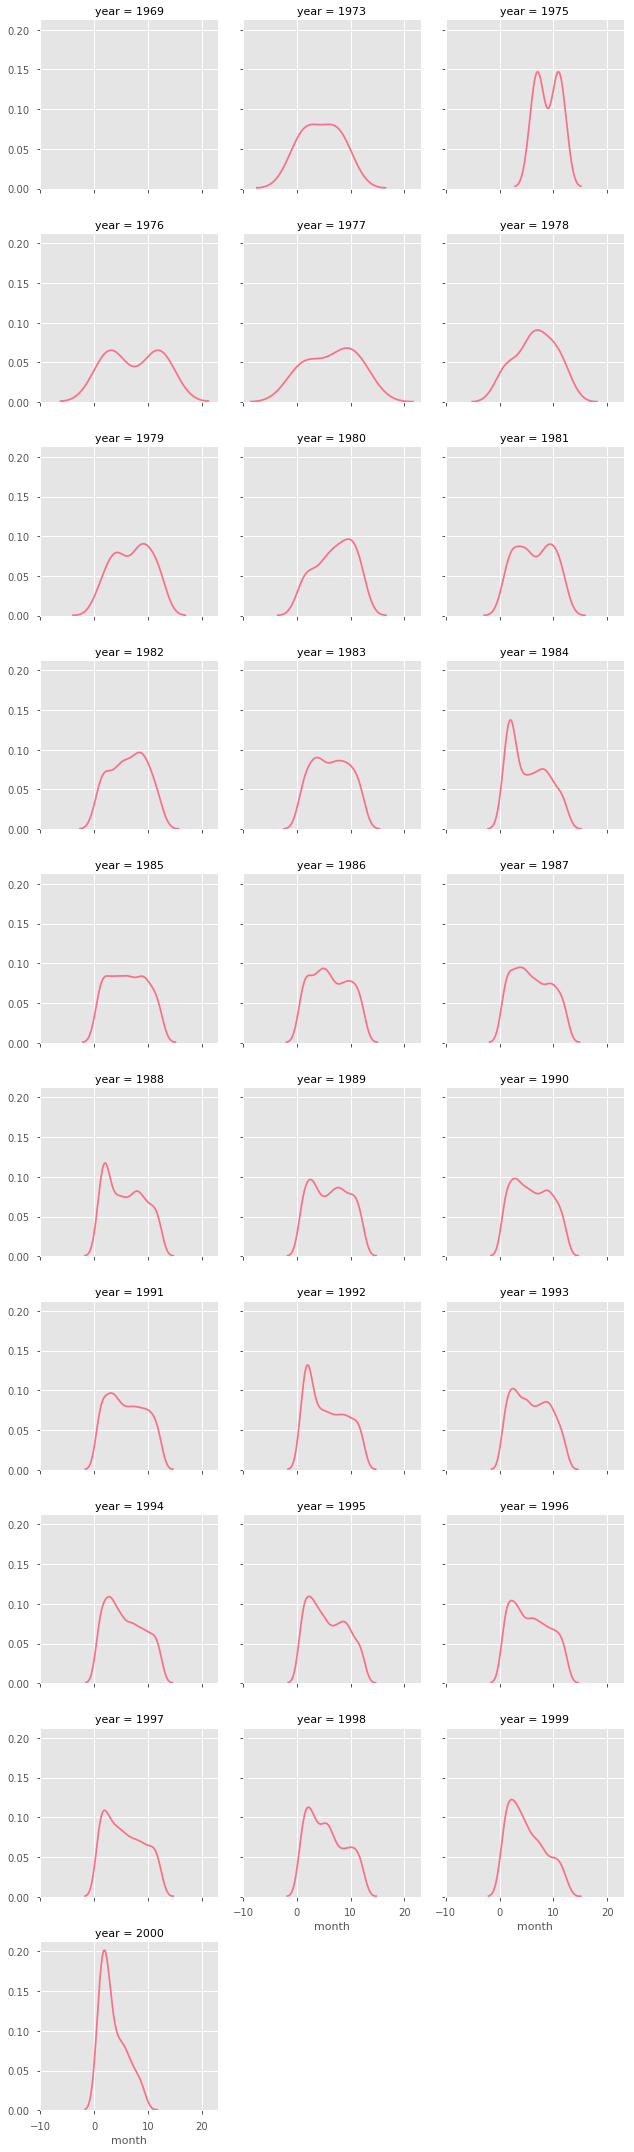

In [27]:
g = sns.FacetGrid(df, col="year",col_wrap=3) 
g.map(sns.kdeplot, "month");

### Density of month of birth for player's born in 1999 and 2000

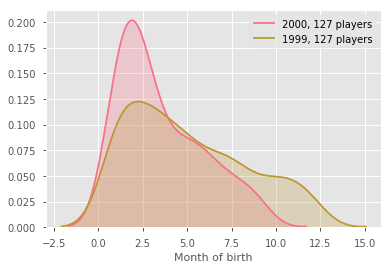

In [28]:
label2000 = str(len(df[df.year==2000]))
sns.kdeplot(df[df.year==2000]['month'], 
            label='2000, '+str(len(df[df.year==2000]))+' players', 
            shade=True)
sns.kdeplot(df[df.year==1999]['month'], 
            label='1999, '+str(len(df[df.year==2000]))+' players', 
            shade=True)
plt.xlabel('Month of birth');

## 6.2 Month of birth by League (Top 10 leagues)

  - Quantity of soccer players by month for the selected leagues (one figure)
  - Quantity of soccer players by month for the selected leagues (one figure per league)
  - Density of month of birth by league
  - Density of month of birth comparison for leagues: Italian Serie A and English Premier
 

According to the IFFHS (International Federation of Football History & Statistics) the **World Ranking 2017 top 10 leagues are**:
   -  1) Spanish Primera Division
   -  2) English Premier League
   -  3) Campeonato Brasileiro Série A (deleted) 
   -  4) Italian Serie A
   -  5) French Ligue 1
   -  6) Colombian Primera A
   -  7) Argentinian Superliga
   -  8) German Bundesliga
   -  9) Paraguay (not available on dataset)
   - 10) Russian Premier League

https://iffhs.de/the-strongest-national-league-of-the-world-spains-primera-division-again/

In [29]:
# Create a list of the leagues to explore:
Top5Leagues = ["Spanish Primera División",
                "English Premier League",
               "Italian Serie A",
                "French Ligue 1", 
               "Colombian Primera A"
               ]

### Quantity of soccer players by month for the selected leagues (one figure)

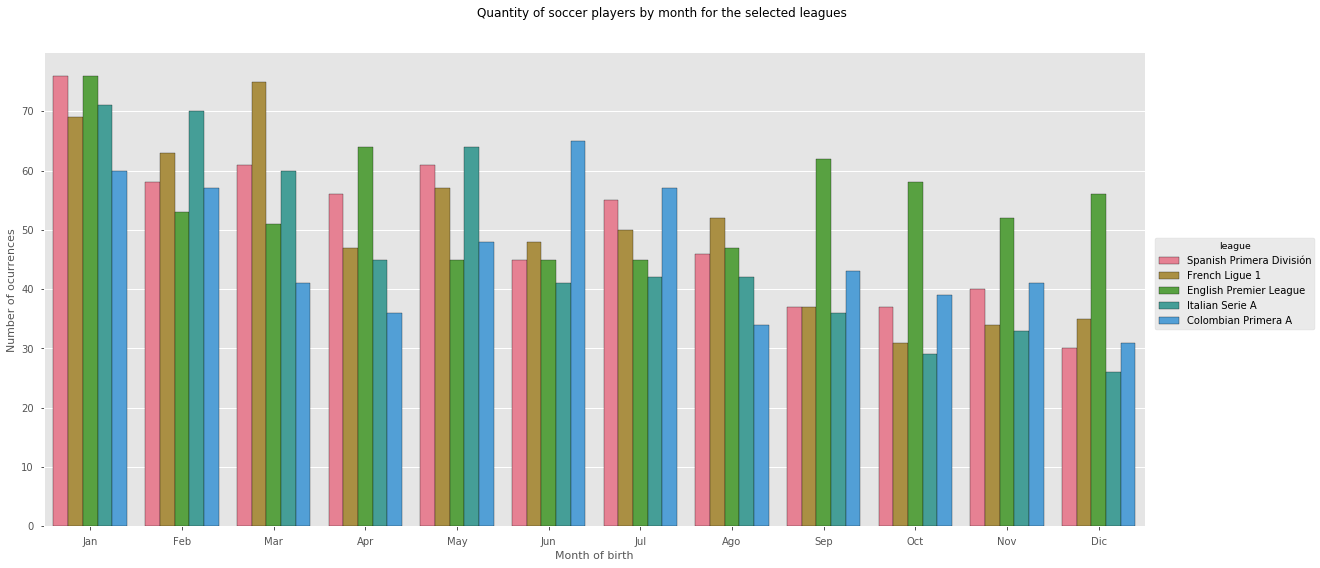

In [30]:
# Create a version of the dataframe to plot
dfPlot = df.copy()

dfPlot = dfPlot[df['league'].isin(Top5Leagues)]

g = sns.factorplot(x='month', 
                   data=dfPlot, 
                   kind="count", 
                   hue='league',
                   size=8, aspect=2, 
                   edgecolor='black');
g.fig.subplots_adjust(top=.9)
monthList = ['Jan','Feb','Mar','Apr',
             'May','Jun','Jul','Ago',
             'Sep','Oct','Nov','Dic']
g.set_xticklabels(monthList)

g.fig.suptitle('Quantity of soccer players by month for the selected leagues')
g.set_ylabels("Number of ocurrences")
g.set_xlabels("Month of birth");


### Quantity of soccer players by month for the selected leagues (one figure per league)

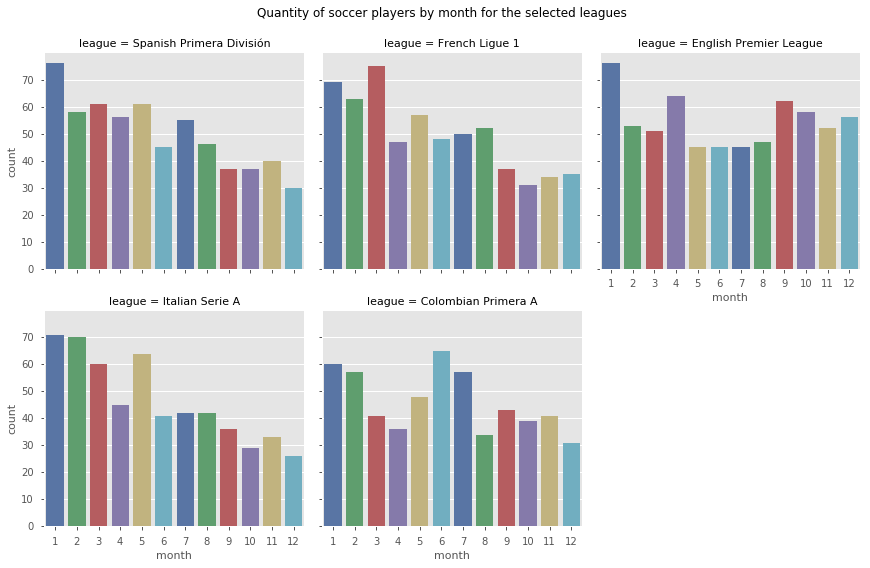

In [31]:
# Lets see the same information on different charts. 
g = sns.factorplot(x="month", kind="count", 
               col="league", col_wrap=3, 
               data=dfPlot, legend=True, 
               palette='deep');

g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Quantity of soccer players by month for the selected leagues');


### Density of month of birth by league

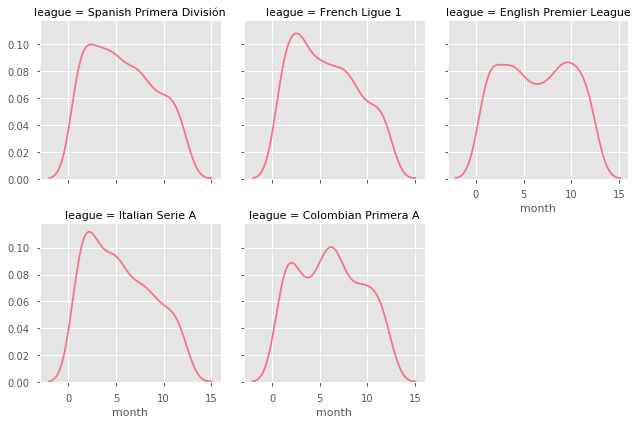

In [32]:
g = sns.FacetGrid(dfPlot, col="league",col_wrap=3) 
g.map(sns.kdeplot, "month");

### Density of month of birth comparison for leagues: Italian Serie A and English Premier


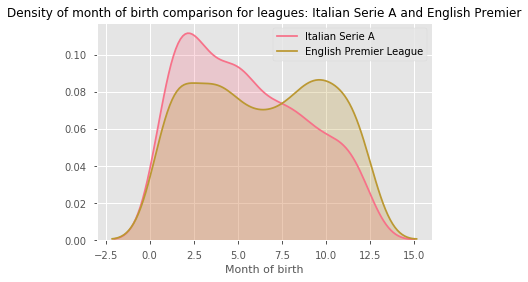

In [33]:
sns.kdeplot(df[df.league=='Italian Serie A']['month'], 
            label='Italian Serie A', 
            shade=True)
sns.kdeplot(df[df.league=='English Premier League']['month'], 
            label='English Premier League', 
            shade=True)
plt.xlabel('Month of birth')
plt.title("Density of month of birth comparison for leagues: Italian Serie A and English Premier");

## 6.3 Month of birth by Club (Top 10 )

  - Quantity of soccer players by month for the selected Clubs (one figure)
  - Quantity of soccer players by month for the selected Clubs (one figure for each club)
  - Density of month of birth for Top clubs
  - Month of birth distribution for Top Clubs

The current club ranking (Last updated: 16 January 2018) from the International Federation of Football History & Statistics (IFFHS) is:

https://en.wikipedia.org/wiki/International_Federation_of_Football_History_%26_Statistics


    -	Spain   -> Real Madrid	
    -	Brazil  -> Grêmio	
    -	England -> Manchester United	
    -	Spain   -> Barcelona	
    -	France  -> Paris Saint-Germain	
    -	Brazil  -> Flamengo	
    -	Italy   -> Juventus	
    -	Germany -> Bayern München	
    -	England -> Manchester City	
    -	Austria -> FC Salzburg	
    
Since Brazilian League has been erased, then the clubs: 
- Grêmio 
- Flamengo 

will not be displayed. 

In [34]:
TopClubs = ["Real Madrid CF",
           "Grêmio",
            "Manchester United",
            "FC Barcelona",
            "Paris Saint-Germain",
            "Flamengo",
            "Juventus",
            "FC Bayern Munich",
            "Manchester City",
            "FC Red Bull Salzburg"
            ]

### Quantity of soccer players by month for the selected Clubs (one figure)

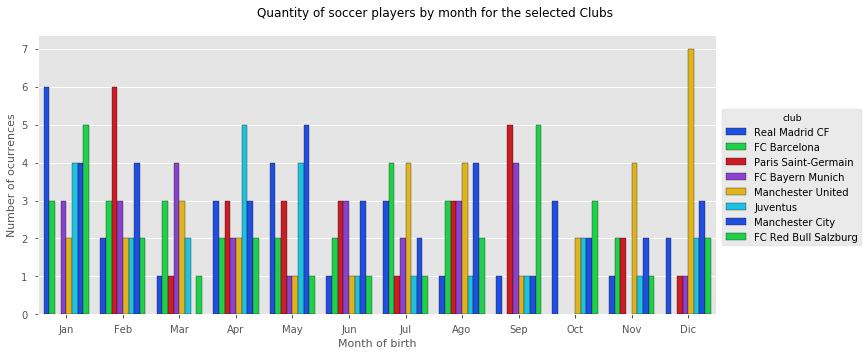

In [35]:

# Create a version of the dataframe to plot
dfPlot = df.copy()

dfPlot = dfPlot[df['club'].isin(TopClubs)]

g = sns.factorplot(x='month', data=dfPlot, 
                   kind="count", hue='club',
                   size=5, aspect=2, edgecolor='black', 
                   palette='bright');

monthList = ['Jan','Feb','Mar','Apr',
             'May','Jun','Jul','Ago',
             'Sep','Oct','Nov','Dic']
g.set_xticklabels(monthList)

g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Quantity of soccer players by month for the selected Clubs')
g.set_ylabels("Number of ocurrences")
g.set_xlabels("Month of birth");

### Quantity of soccer players by month for the selected Clubs (one figure for each club)

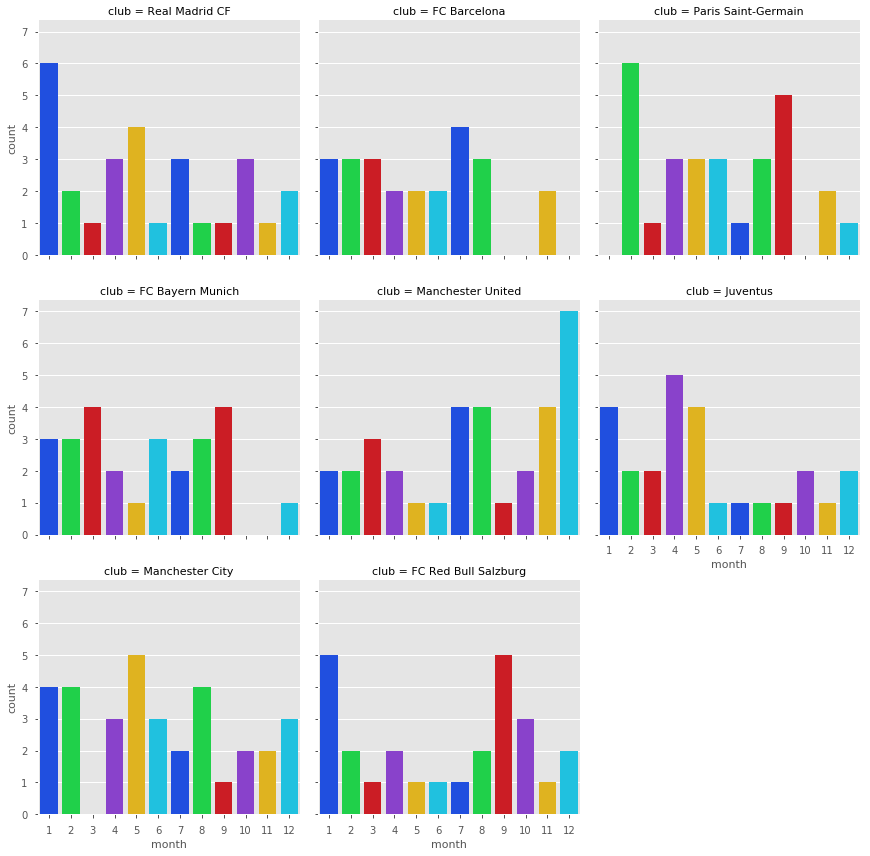

In [36]:
# Lets see the same information on different charts. 
sns.factorplot(x="month", kind="count", 
               col="club", col_wrap=3, 
               data=dfPlot, legend=True, 
               palette='bright');

### Density of month of birth for Top clubs

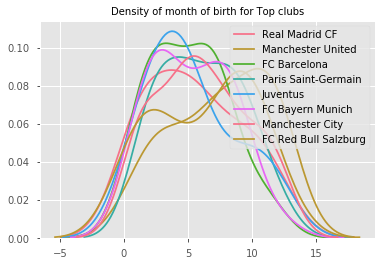

In [37]:
for club in TopClubs:
    ax = sns.kdeplot(dfPlot[dfPlot['club']==club]['month'],  label=club, legend=True)
g.fig.subplots_adjust(top=.9)
ax.set_title("Density of month of birth for Top clubs",fontsize=10);

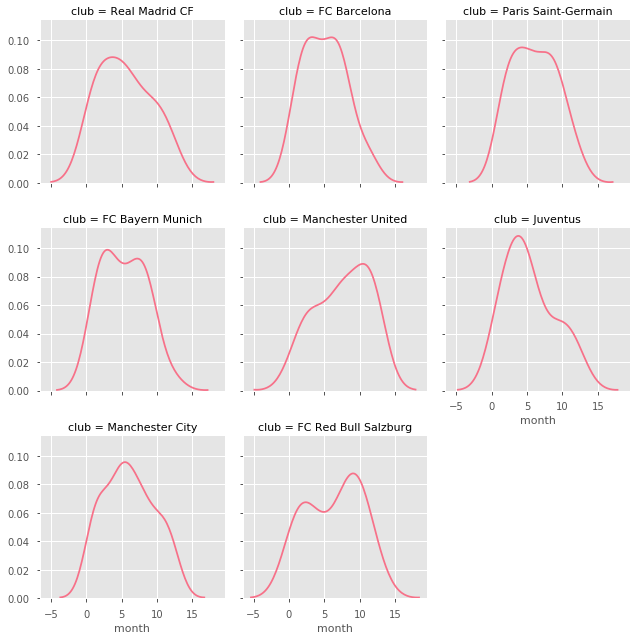

In [38]:
g = sns.FacetGrid(dfPlot, col="club",col_wrap=3) 
g.map(sns.kdeplot, "month");

### Month of birth distribution for Top Clubs

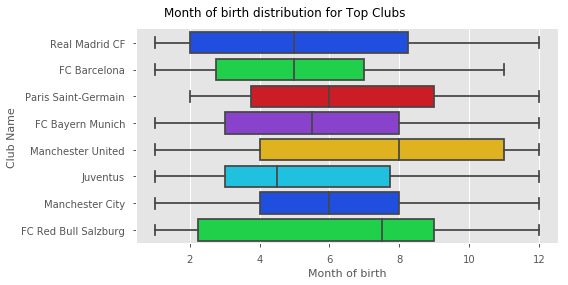

In [39]:
g = sns.factorplot(x="month", y="club", 
                   data=dfPlot, kind='box', 
                   size=4, aspect=2, 
                   palette='bright')

#monthList = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']
#g.set_xticklabels(monthList)
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Month of birth distribution for Top Clubs')
g.set_ylabels("Club Name")
g.set_xlabels("Month of birth");


## 6.4 Month of birth by Overall Category

  - Quantity of soccer players by month and Overall Category
  - Density of month of birth by overall category
  - Density of month of birth by overall category (one figure for each category)
  - Density of month of birth comparison for overall category 40 and overall category 90

### Quantity of soccer players by month and Overall Category

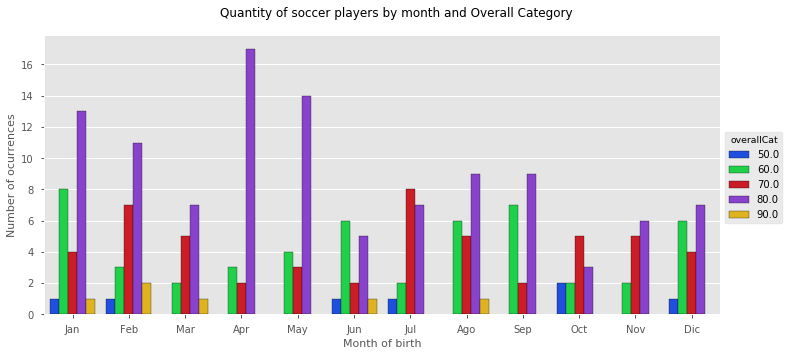

In [40]:
g = sns.factorplot(x='month', data=dfPlot, 
                   kind="count", hue='overallCat',
                   size=5, aspect=2, edgecolor='black', 
                   palette='bright');

monthList = ['Jan','Feb','Mar','Apr',
             'May','Jun','Jul','Ago',
             'Sep','Oct','Nov','Dic']
g.set_xticklabels(monthList)

g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Quantity of soccer players by month and Overall Category')
g.set_ylabels("Number of ocurrences")
g.set_xlabels("Month of birth");

### Density of month of birth by overall category

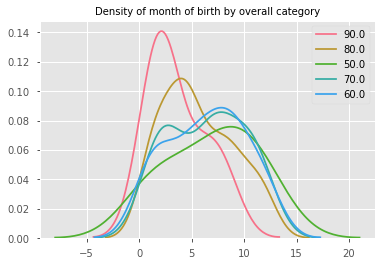

In [41]:
sns.set_palette('husl')
overallCategories = df.groupby("overallCat").full_name.count().sort_values(ascending=True)
overallCategories = list(overallCategories.index)
for category in overallCategories:
    ax = sns.kdeplot(dfPlot[dfPlot['overallCat']==category]['month'],  
                     label=category, 
                     legend=True)
g.fig.subplots_adjust(top=.9)
ax.set_title("Density of month of birth by overall category",fontsize=10);


### Density of month of birth by overall category (one figure for each category)

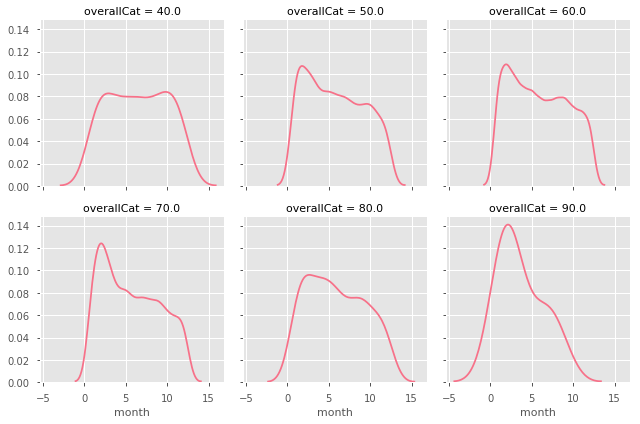

In [42]:
dfPlot = df.copy()
g = sns.FacetGrid(dfPlot, col="overallCat",col_wrap=3) 
g.map(sns.kdeplot, "month");

### Density of month of birth comparison for overall category 40 and overall category 90

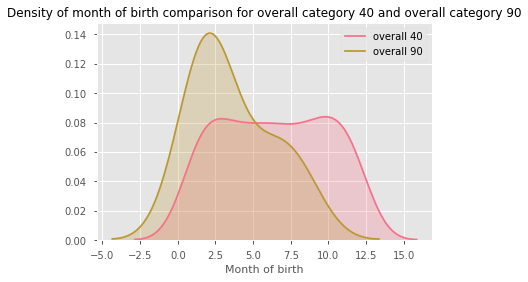

In [43]:
sns.kdeplot(df[df.overallCat==40.0]['month'], 
            label='overall 40', 
            shade=True)
sns.kdeplot(df[df.overallCat==90.0]['month'], 
            label='overall 90', 
            shade=True)
plt.xlabel('Month of birth');
plt.title("Density of month of birth comparison for overall category 40 and overall category 90");

## 6.5 Month of birth by nationality (top 10 nationalities by number of players) 

  - Quantity of soccer players by month and nationality
  - Density of month of birth by nationality (one figure)
  - Density of month of birth by nationality (one figure for each nationality)
  - Density of month of birth comparison for 4 nationalities

### Quantity of soccer players by month and nationality

In [44]:
# Selection of top 10 nationalities by number of players
Top10Nationality = df.groupby("nationality").full_name.count().sort_values(ascending=True).tail(10)
Top10Nationality = list(Top10Nationality.index)
Top10Nationality

['Netherlands',
 'Japan',
 'Brazil',
 'Colombia',
 'Italy',
 'Argentina',
 'France',
 'Spain',
 'Germany',
 'England']

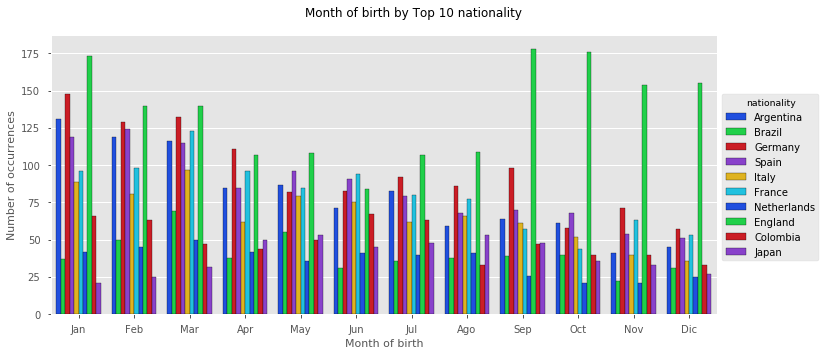

In [45]:
dfPlot = df[df['nationality'].isin(Top10Nationality)]

g = sns.factorplot(x='month', data=dfPlot, 
                   kind="count", hue='nationality',
                   size=5, aspect=2, edgecolor='black', 
                   palette='bright');

g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Month of birth by Top 10 nationality')
g.set_ylabels("Number of occurrences")
g.set_xlabels("Month of birth");
g.set_xticklabels(monthList);

### Density of month of birth by nationality (one figure)

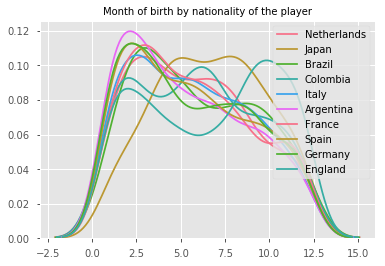

In [48]:
sns.set_palette('husl')
for nationality in Top10Nationality:
    ax = sns.kdeplot(dfPlot[dfPlot['nationality']==nationality]['month'],  
                     label=nationality, legend=True)

g.fig.subplots_adjust(top=.9)
ax.set_title("Month of birth by nationality of the player",fontsize=10);

### Density of month of birth by nationality (one figure for each nationality)

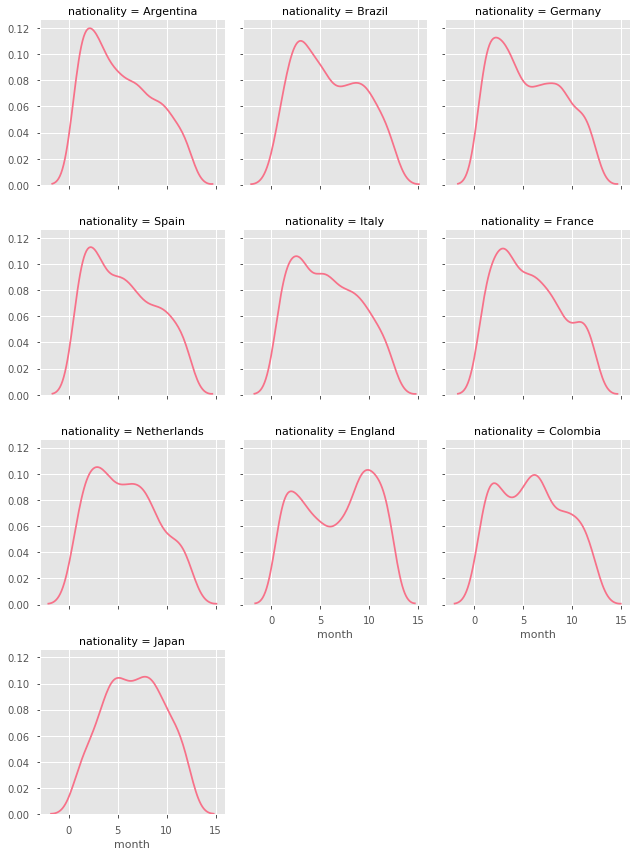

In [49]:
g = sns.FacetGrid(dfPlot, col="nationality", col_wrap=3) 
g.map(sns.kdeplot, "month");

### Density of month of birth comparison for 4 nationalities (Colombia, Argentina, England, Spain)

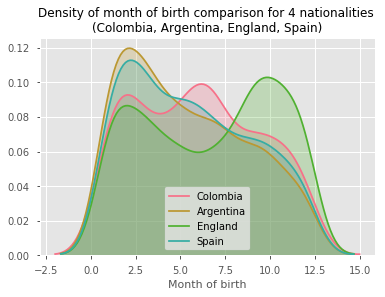

In [50]:
sns.kdeplot(df[df.nationality=='Colombia']['month'], 
            label='Colombia', 
            shade=True)
sns.kdeplot(df[df.nationality=='Argentina']['month'], 
            label='Argentina', 
            shade=True)
sns.kdeplot(df[df.nationality=='England']['month'], 
            label='England', 
            shade=True)
sns.kdeplot(df[df.nationality=='Spain']['month'], 
            label='Spain', 
            shade=True)
plt.xlabel('Month of birth');
plt.title("Density of month of birth comparison for 4 nationalities \n"+
        "(Colombia, Argentina, England, Spain)");

# 7. Conclusions

- The best overall players were born in february and the worst players were born in october


- There are 127 players wich were born in 1999 and another 127 born in 2000. The difference of month of birth for these years is adverse. 20% of 1999's player's were born in february whereas those born in 2000 represent only 12,5% in July.


- Italian and English league players are completely different (in terms of month of birth). Most playes in Italy are born between January and February while player's in England are born almost equally every month.


- Manchers United players are mostly born in November and Dicember, however FC Barcelona does not have any player born in September, October and December. 

- I expected that south hemisphere player's would modify these conditions to the opossite but it seems it depends on the country and each country school system. Argentinian players (on any league) are mostly born in February but Colombian players are mostly born at the end of the year. 



# 8. Author Notes

I have enjoyed doing this analysis but I want to compare and contrast the information with other sources. I would love to compare different team and individual sports such as football, basketball, baseball with tennis, swimming and golf. I will try to find a  dataset to continue studying this theory with further data. 
